<a href="https://colab.research.google.com/github/hemendrasakpal/AINE-AI-Projects/blob/main/Project8/Copy_of_Machine_Learning_for_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 8: Machine Learning for Predictive Analytics

## Packages and setup

In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

## Reading data and initial processing

In [ ]:
#edit the file location of raw data set
from google.colab import files
uploaded = files.upload()
import io
cust_df = pd.read_csv(io.BytesIO(uploaded['Telecom Data.csv']))
# cust_df=pd.read_csv("C:/Users/Pranav Dubey/Desktop/VIP/Telcom Churn Analysis.csv")

Saving Telecom Data.csv to Telecom Data (4).csv


## Exercise

## Placeholder for your analysis

In [ ]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape

cust_df.info()

cust_df.head()




(51047, 58)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [ ]:
#How many customers had zero monthly revenue?
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis
cust_df[cust_df['MonthlyRevenue'] == 0]['MonthlyRevenue'].count()

6

### Q1.2 How many columns has missing values percentage > 5%

In [ ]:
#Calculate for each column % of missing value in the data
#How many columns has missing values percentage > 5%
#What strategy should be used for imputation?

missing_value_percentage=(cust_df.isnull().sum()/cust_df.count())*100
missing_value_percentage

CustomerID                   0.000000
Churn                        0.000000
MonthlyRevenue               0.306538
MonthlyMinutes               0.306538
TotalRecurringCharge         0.306538
DirectorAssistedCalls        0.306538
OverageMinutes               0.306538
RoamingCalls                 0.306538
PercChangeMinutes            0.724152
PercChangeRevenues           0.724152
DroppedCalls                 0.000000
BlockedCalls                 0.000000
UnansweredCalls              0.000000
CustomerCareCalls            0.000000
ThreewayCalls                0.000000
ReceivedCalls                0.000000
OutboundCalls                0.000000
InboundCalls                 0.000000
PeakCallsInOut               0.000000
OffPeakCallsInOut            0.000000
DroppedBlockedCalls          0.000000
CallForwardingCalls          0.000000
CallWaitingCalls             0.000000
MonthsInService              0.000000
UniqueSubs                   0.000000
ActiveSubs                   0.000000
ServiceArea 

<mark>__Result:__
    
Type your answer here for how would you impute the missing values (if any)

**No columns have missing values more than 5% so we can drop the rows**

In [ ]:
cust_df = cust_df.dropna()
cust_df.isnull().sum()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

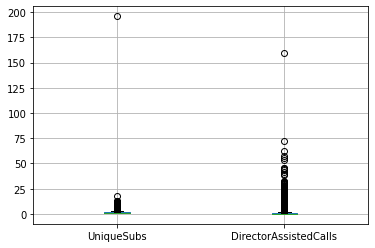

In [ ]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
cust_df.boxplot(column=cols)

,UniqueSubs,DirectorAssistedCalls
0.95,3.0,4.21
0.96,3.0,4.70
0.97,4.0,5.45
0.98,4.0,6.93
0.99,5.0,9.65
1.00,196.0,159.39


1.0 3.0


,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51035,3399894,No,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,5.7,1.0,13.0,0.7,0.0,11.2,5.7,0.0,29.3,17.0,6.7,0.0,0.0,30,1,1,NEVELC619,1.0,1.0,883.0,48.0,48.0,Yes,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,No,No,0,4,No,0,Unknown,No,2-High,Other,Professional,No
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,8.7,0.0,0.0,14.0,0.0,0.0,16.0,14.7,0.7,0.0,0.3,30,1,1,NEVENC760,1.0,1.0,883.0,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,23.3,0.0,1.7,70.2,25.7,0.3,262.0,12.7,15.3,0.0,0.7,30,1,1,LAXVNY818,1.0,1.0,882.0,50.0,60.0,No,No,No,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown
51041,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,1.0,27.0,0.0,0.0,21.7,1.3,0.0,99.3,54.3,5.0,0.0,0.0,30,1,1,LAXDOW562,2.0,2.0,489.0,22.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,2,No,0,30,No,5-Low,Other,Professional,Yes


0.0 4.21


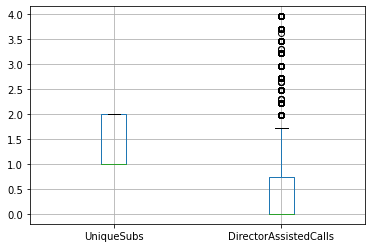

In [ ]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again
#Use "quantile" function to identify top 1% outliers
qValue = [i/100 for i in range(95,101,1)]
cust_df[cols].quantile(qValue)
min_outlier1, max_outlier1 = cust_df.UniqueSubs.quantile([0.00, 0.95])
print(min_outlier1, max_outlier1)

cust_df = cust_df[(cust_df.UniqueSubs >=min_outlier1) & (cust_df.UniqueSubs < max_outlier1)]
cust_df
min_outlier2, max_outlier2 = cust_df.DirectorAssistedCalls.quantile([0.00, 0.95])
print(min_outlier2, max_outlier2)
cust_df = cust_df[(cust_df.DirectorAssistedCalls >= min_outlier2) & (cust_df.DirectorAssistedCalls < max_outlier2)]
cust_df.boxplot(column=cols)

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

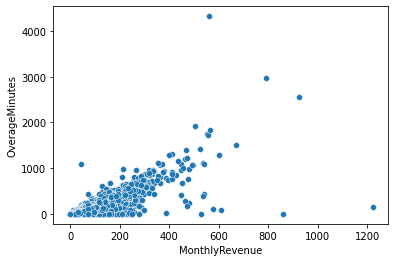

In [ ]:
#use scatter plot to find the correlation between monthly revenue and overage minutes
sns.scatterplot(x='MonthlyRevenue', y='OverageMinutes', data=cust_df)

<mark>__Result:__
    
Type your interpretation here based on the scatter plot analysis

**There is a positive correlation between the monthly revenue and overage minutes**

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

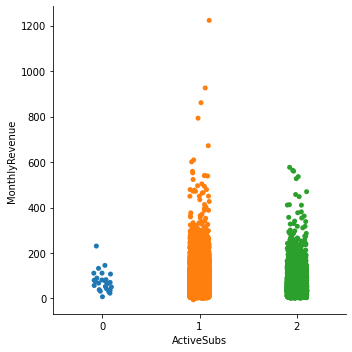

In [ ]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x='ActiveSubs', y='MonthlyRevenue', data=cust_df)

<mark>__Result:__
    
Type your interpretation here based on the category plot analysis

The revenue is higher for single subscribers compared to muliple subscibers

### Q2.3 Does credit rating have an impact in churn rate?

In [ ]:
pd.crosstab(cust_df.Churn, cust_df.CreditRating)

CreditRating,1-Highest,2-High,3-Good,4-Medium,5-Low,6-VeryLow,7-Lowest
Churn,,,,,,,
No,4508,11484,4630,3526,4390,541,1383
Yes,1998,4936,2011,1221,1194,188,556


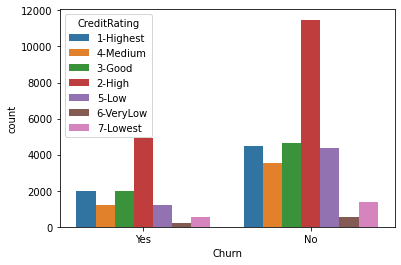

In [ ]:
sns.countplot(x="Churn",hue="CreditRating",data=cust_df)

<mark>__Result:__
    
Type your interpretation here based on the analysis above

**Credit rating has no effect on the churn rate**

### Placeholder for additional exploratory analysis

<Figure size 1440x1440 with 0 Axes>

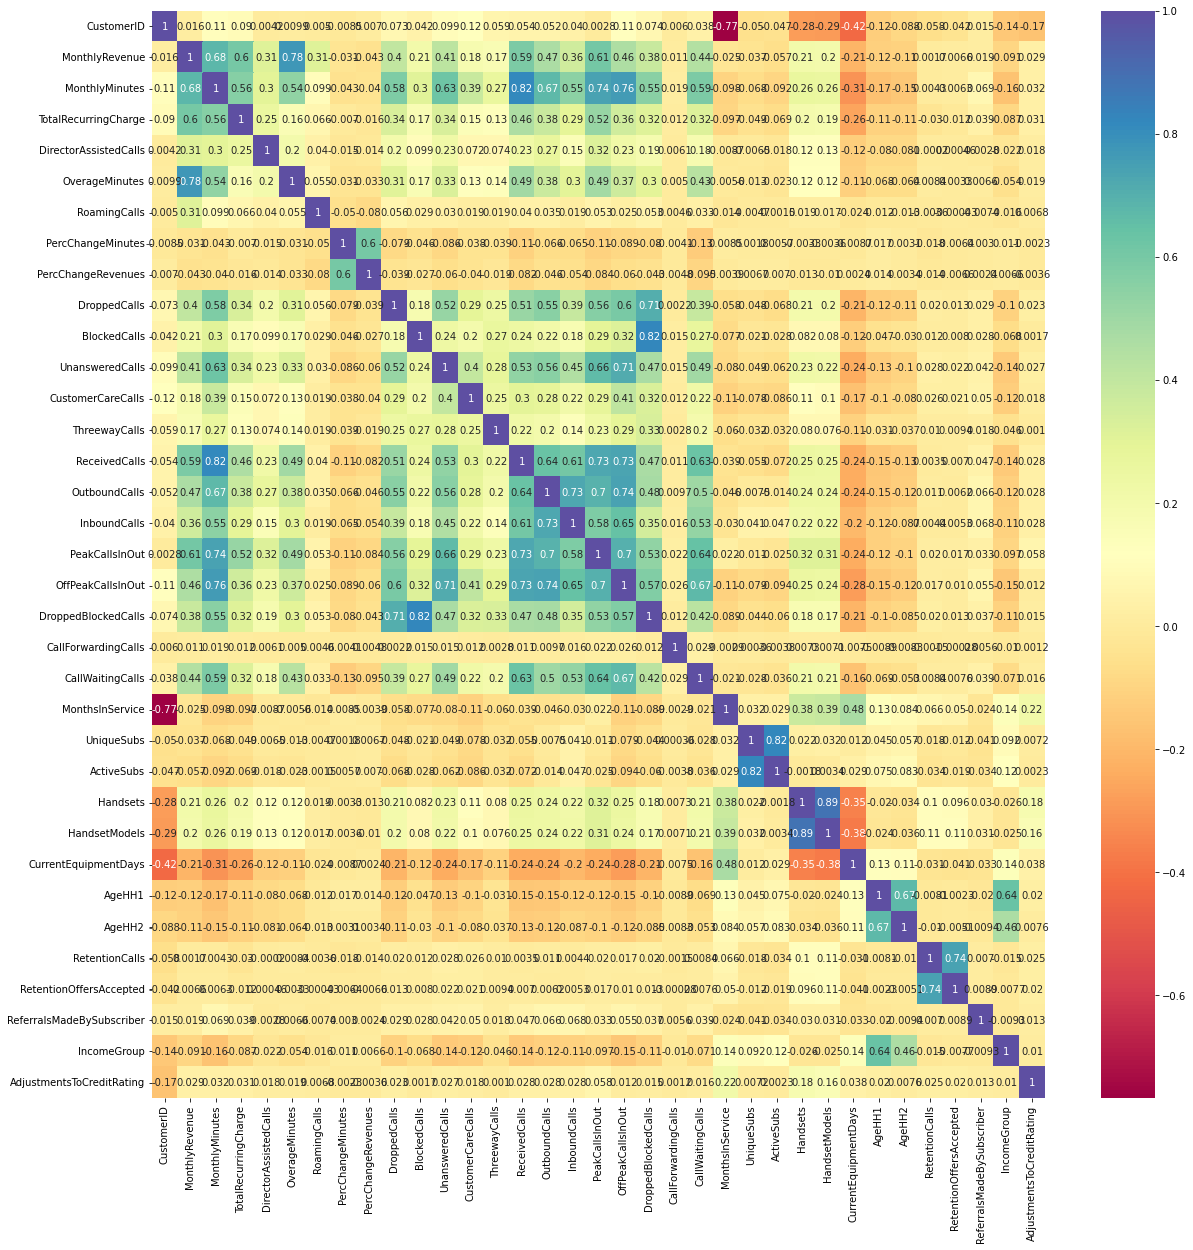

In [ ]:
#type your code here for any additional exploratory analysis (if any)
correlation = cust_df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlation,cmap="Spectral",annot=True)

## Q3. Create additional features to help predict churn

In [ ]:
#wrapper function to create additional features for churn prediction
def create_features(cust_df):
    
    #3.1 Percent of current active subs over total subs
    cust_df['perc_active_subs'] = cust_df['ActiveSubs'] / cust_df['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    cust_df['perc_recurrent_charge']= cust_df['TotalRecurringCharge']/cust_df['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    cust_df['perc_overage_minute'] = cust_df['OverageMinutes']/cust_df['MonthlyMinutes']
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    
    return cust_df  


In [ ]:
#Make a call to the feature engineering wrapper function for churn prediction
cust_df=create_features(cust_df)
cust_df  

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minute
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,0.5,0.916667,0.000000
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,1.0,1.000589,0.000000
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes,1.0,1.000000,0.000000
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No,1.0,0.911522,0.000000
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes,1.0,0.991832,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51035,3399894,No,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,5.7,1.0,13.0,0.7,0.0,11.2,5.7,0.0,29.3,17.0,6.7,0.0,0.0,30,1,1,NEVELC619,1.0,1.0,883.0,48.0,48.0,Yes,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,No,No,0,4,No,0,Unknown,No,2-High,Other,Professional,No,1.0,inf,0.000000
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,8.7,0.0,0.0,14.0,0.0,0.0,16.0,14.7,0.7,0.0,0.3,30,1,1,NEVENC760,1.0,1.0,883.0,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes,1.0,0.532581,0.682540
51040,3399942,No,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,23.3,0.0,1.7,70.2,25.7,0.3,262.0,12.7,15.3,0.0,0.7,30,1,1,LAXVNY818,1.0,1.0,882.0,50.0,60.0,No,No,No,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown,1.0,0.972357,0.005525
51041,3399946,Yes,117.49,384.0,30.0,0.00,250.0,0.0,0.0,0.0,4.0,1.0,27.0,0.0,0.0,21.7,1.3,0.0,99.3,54.3,5.0,0.0,0.0,30,1,1,LAXDOW562,2.0,2.0,489.0,22.0,0.0,No,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,2,No,0,30,No,5-Low,Other,Professional,Yes,1.0,0.255341,0.651042


## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [ ]:
churn =  ['Churn']

# Defining the map function
def churn_val(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
cust_df[churn] = cust_df[churn].apply(churn_val)
cust_df.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minute
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No,0.5,0.916667,0.0
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes,1.0,1.000589,0.0
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes,1.0,1.000000,0.0
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No,1.0,0.911522,0.0
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes,1.0,0.991832,NaN


In [ ]:
cust_df.replace({-np.inf: -1_000_000, np.inf: 1_000_000}, inplace=True)

In [ ]:
cust_df = cust_df.dropna()

In [ ]:
count_0, count_1 = cust_df.Churn.value_counts()

churn_0 = cust_df[cust_df["Churn"] == 0]
churn_1 = cust_df[cust_df["Churn"] == 1]

churn_1_over = churn_1.sample(count_0,replace=True)

test_over = pd.concat([churn_1_over, churn_0], axis=0)
cust_df = test_over
cust_df

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,perc_active_subs,perc_recurrent_charge,perc_overage_minute
1054,3008302,1,30.25,64.0,30.0,0.25,0.0,0.0,4.0,-0.2,2.7,0.0,4.3,0.0,0.3,13.8,0.0,0.0,28.0,0.7,2.7,0.0,0.0,42,1,1,MILMIL414,1.0,1.0,1284.0,42.0,0.0,No,Yes,No,No,No,Known,No,No,No,Yes,No,Yes,0,0,Yes,No,0,6,No,1,Unknown,No,1-Highest,Suburban,Professional,No,1.0,0.991736,0.000000
35936,3286870,1,64.36,453.0,34.0,0.00,86.0,0.8,-391.0,-64.4,19.0,0.7,28.7,6.3,1.7,51.9,52.0,2.7,154.0,62.7,19.7,0.0,4.3,14,1,1,HARBRI203,3.0,3.0,167.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,1,0,No,No,0,0,No,0,200,Yes,5-Low,Other,Other,Unknown,1.0,0.528278,0.189845
27267,3215718,1,95.24,371.0,105.0,0.25,0.0,0.0,-104.0,-0.2,2.7,2.3,27.3,0.0,0.0,59.5,9.0,13.7,96.0,53.0,5.0,0.0,1.3,14,2,2,NSHCOL615,1.0,1.0,420.0,20.0,0.0,Yes,No,Yes,No,No,Known,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Other,Unknown,1.0,1.102478,0.000000
36569,3291986,1,36.45,158.0,45.0,0.00,4.0,0.0,0.0,-1.5,4.7,3.0,20.7,0.7,0.0,28.1,12.3,0.7,29.0,38.7,7.7,0.0,0.3,12,1,1,SFRSFR415,1.0,1.0,348.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,Unknown,No,6-VeryLow,Other,Other,Unknown,1.0,1.234568,0.025316
1846,3014498,1,16.99,7.0,17.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0,1.3,0.0,0.0,0.0,0.0,0.0,3.0,0.7,0.0,0.0,0.0,41,1,1,DENDEN303,1.0,1.0,1240.0,68.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,Yes,Yes,Yes,0,0,No,No,0,1,No,0,Unknown,No,3-Good,Other,Retired,No,1.0,1.000589,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51032,3399878,0,19.96,14.0,17.0,0.00,0.0,0.0,-10.0,1.0,0.0,0.0,0.7,0.0,0.0,0.0,0.0,0.0,7.0,1.3,0.0,0.0,0.0,35,1,1,LAXRIV909,2.0,2.0,33.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,Yes,No,No,No,No,1,1,No,No,0,3,No,0,30,Yes,1-Highest,Town,Other,Unknown,1.0,0.851703,0.000000
51035,3399894,0,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,5.7,1.0,13.0,0.7,0.0,11.2,5.7,0.0,29.3,17.0,6.7,0.0,0.0,30,1,1,NEVELC619,1.0,1.0,883.0,48.0,48.0,Yes,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,No,No,0,4,No,0,Unknown,No,2-High,Other,Professional,No,1.0,1000000.000000,0.000000
51037,3399906,0,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,8.7,0.0,0.0,14.0,0.0,0.0,16.0,14.7,0.7,0.0,0.3,30,1,1,NEVENC760,1.0,1.0,883.0,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,3,No,0,Unknown,No,3-Good,Other,Other,Yes,1.0,0.532581,0.682540
51040,3399942,0,71.99,724.0,70.0,0.00,4.0,0.9,-40.0,-2.0,14.3,1.0,23.3,0.0,1.7,70.2,25.7,0.3,262.0,12.7,15.3,0.0,0.7,30,1,1,LAXVNY818,1.0,1.0,882.0,50.0,60.0,No,No,No,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,7,No,0,Unknown,No,1-Highest,Other,Professional,Unknown,1.0,0.972357,0.005525


In [ ]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split

#Define columns to be included in X and y
X = cust_df.drop(columns=['Churn'])
y = cust_df.Churn

#Feature scaling for all continuous variable
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#Create dummy variables for all categorical variables
X = pd.get_dummies(X)
X_scaled = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0)

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set


In [ ]:
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model

y_pred = model.predict(X_test)
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
y_pred_prob = (model.predict_proba(X_test))
print("Decision")
y_pred_prob[:,1]

#Evaluate model accuracy using fitted y value and actual y_test
from sklearn.metrics import confusion_matrix, accuracy_score
acc_score = accuracy_score(y_test,y_pred)
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
# precision = 
conf_matrix

true_positive = conf_matrix[0,0]
false_positive = conf_matrix[0,1]
false_negative = conf_matrix[1,0]
true_negative = conf_matrix[1,1]

Decision


array([0.30029006, 0.73122641, 0.27696391, ..., 0.33475841, 0.87874596,
       0.21354865])

array([[5370, 3736],
       [3612, 5419]])

In [ ]:
print("Accuracy", acc_score)
print("\n")
precision = true_positive/(true_positive + false_positive)
print("Precision",precision)
print("\n")
recall = true_positive/(true_positive + false_negative)
print("Recall",recall)

Accuracy 0.5948613331863042


Precision 0.5897210630353613


Recall 0.5978623914495658


0.5948826774594369

Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

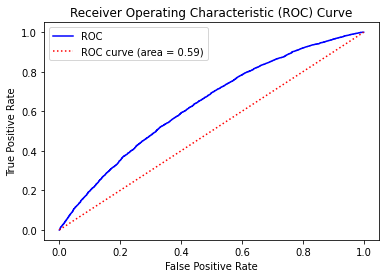

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

auc  = roc_auc_score(y_test,y_pred)
auc

fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob[:,1])

plt.plot(fpr, tpr, color='blue', label='ROC')
plt.plot([0, 1], [0, 1], color='red', linestyle=':',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_pred)
average_precision

0.5543273152562554

Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.55')

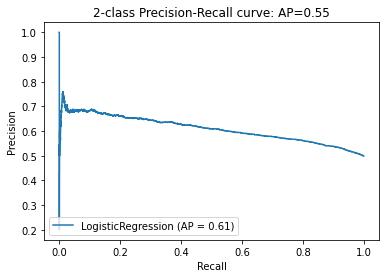

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(model, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [ ]:
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators= 100)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Accuracy 0.8866957049126096


Precision 0.9162090929057765


Recall 0.865905552672548


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Receiver Operating Characteristic (ROC) Curve')

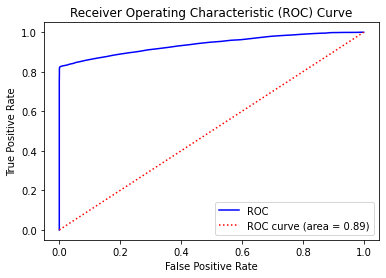

In [ ]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model
y_pred = rfc.predict(X_test)

#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)

y_pred_prob = rfc.predict_proba(X_test)

#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix
acc_score = accuracy_score(y_test,y_pred)
rfc_conf = confusion_matrix(y_test,y_pred)

true_positive = rfc_conf[0,0]
false_positive = rfc_conf[0,1]
false_negative = rfc_conf[1,0]
true_negative = rfc_conf[1,1]
auc = roc_auc_score(y_test, y_pred)
precision = true_positive/(true_positive + false_positive)
recall = true_positive/(true_positive + false_negative)
f1 = 2*((precision*recall))/(precision + recall)

print("Accuracy", acc_score)
print("\n")
print("Precision",precision)
print("\n")
recall = true_positive/(true_positive + false_negative)
print("Recall",recall)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:,1])

plt.plot(fpr, tpr, color='blue', label='ROC')
plt.plot([0, 1], [0, 1], color='red', linestyle=':',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

<mark>__Result:__
    
Type your answer from the model building exercise here, i.e., which model has better accuracy and using what metrics?

**When we compare the accuracy, precision and recall of both Logitic and Random Forest, Random Forest has much better accuracy**

### Q4.3 Identify most important features impacting churn

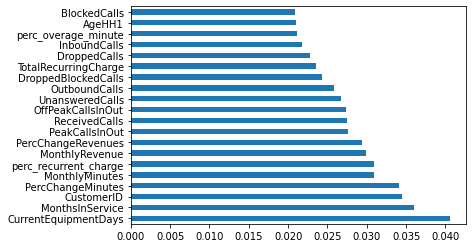

In [ ]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')